# Homework 5 - Bixby - Ilham Habibullah - AI03018
# Image Processing Using Python-OpenCV

In [ ]:
import cv2
import numpy as np
from skimage import io
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
# URL Image

img_urls = ["https://media.istockphoto.com/photos/coins-collection-isolated-on-white-picture-id147063335?k=20&m=147063335&s=612x612&w=0&h=KLZ8GF9AjbjoK4OXTcZjnZDogT-hV6Hr7atjczfFhTI="]

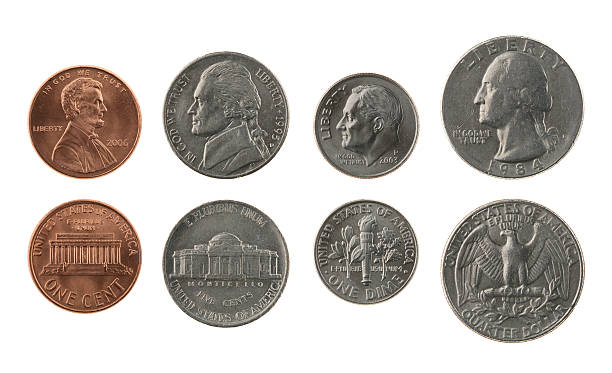

In [ ]:
# Read and visualize the image and then save it to a variable

image_bgr = io.imread(img_urls[0])
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
cv2_imshow(image_rgb)

# Grayscale Image

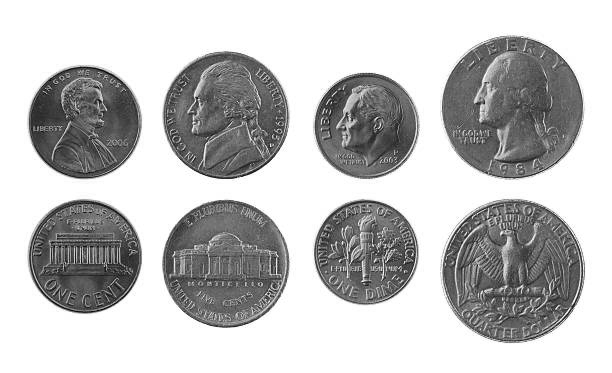

In [ ]:
# Convert the image to a grayscale image

image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
cv2_imshow(image_gray)

# Histogram

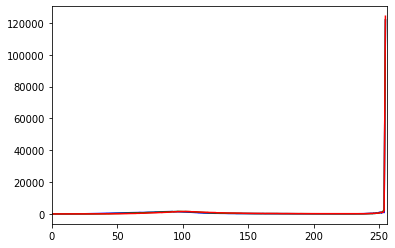

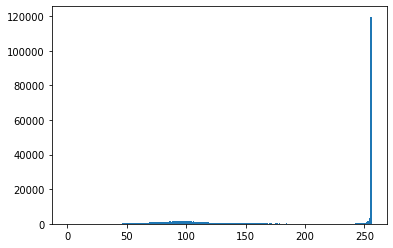

In [ ]:
# Show the histogram of the grayscale image

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([image_rgb],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()
plt.hist(image_gray.ravel(),bins = 256, range = [0,256]) 
plt.show()

# Simple Thresholding

In [ ]:
ret, thresh1 = cv2.threshold(image_gray, 120, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(image_gray, 120, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(image_gray, 120, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(image_gray, 120, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(image_gray, 120, 255, cv2.THRESH_TOZERO_INV)

In [ ]:
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [image_bgr, thresh1, thresh2, thresh3, thresh4, thresh5]

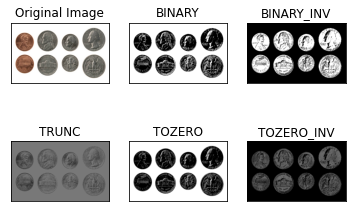

In [ ]:
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Adaptive Thresholding

In [ ]:
image_gray = cv2.medianBlur(image_gray,5)

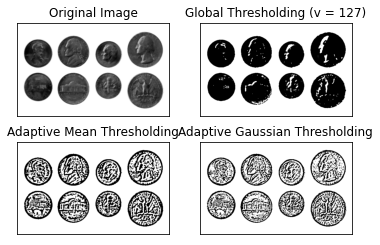

In [ ]:
ret,th1 = cv2.threshold(image_gray,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [image_gray, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Otsu's Binarization

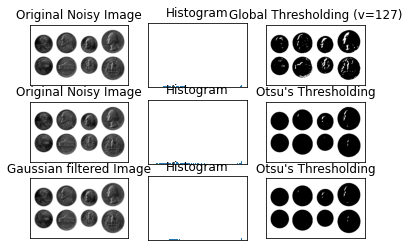

In [ ]:
# global thresholding
ret1,th1 = cv2.threshold(image_gray,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image_gray,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [image_gray, 0, th1,
          image_gray, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

# Bitwise_Not

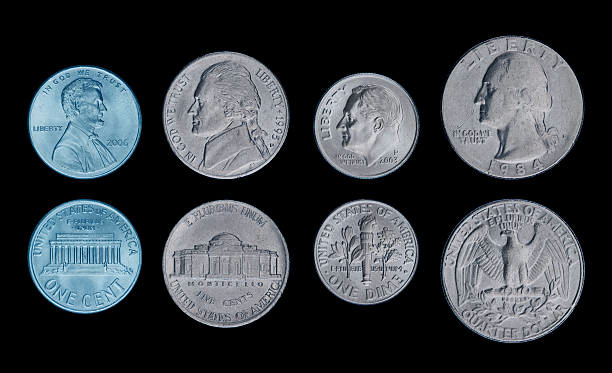

In [ ]:
bitNot1 = cv2.bitwise_not(image_rgb)
cv2_imshow(bitNot1)

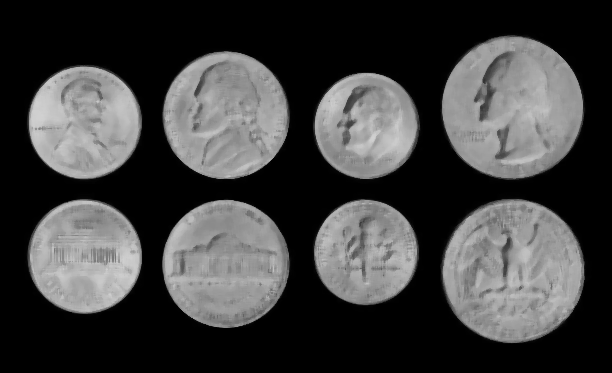

In [ ]:
bitNot2 = cv2.bitwise_not(image_gray)
cv2_imshow(bitNot2)